In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import sys
import plot_settings
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif']= 'STIXGeneral'
mpl.rcParams['mathtext.fontset']= 'stix'
mpl.rcParams['font.size']= 28
import matplotlib.ticker as tk

-0.75640510400923
[0.e+00 1.e-08 2.e-08 3.e-08]


/var/folders/b2/jdslshn514l8psbztcg78gcm0000gn/T/ipykernel_38956/2635715056.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['' for i in ax.get_yticks()])


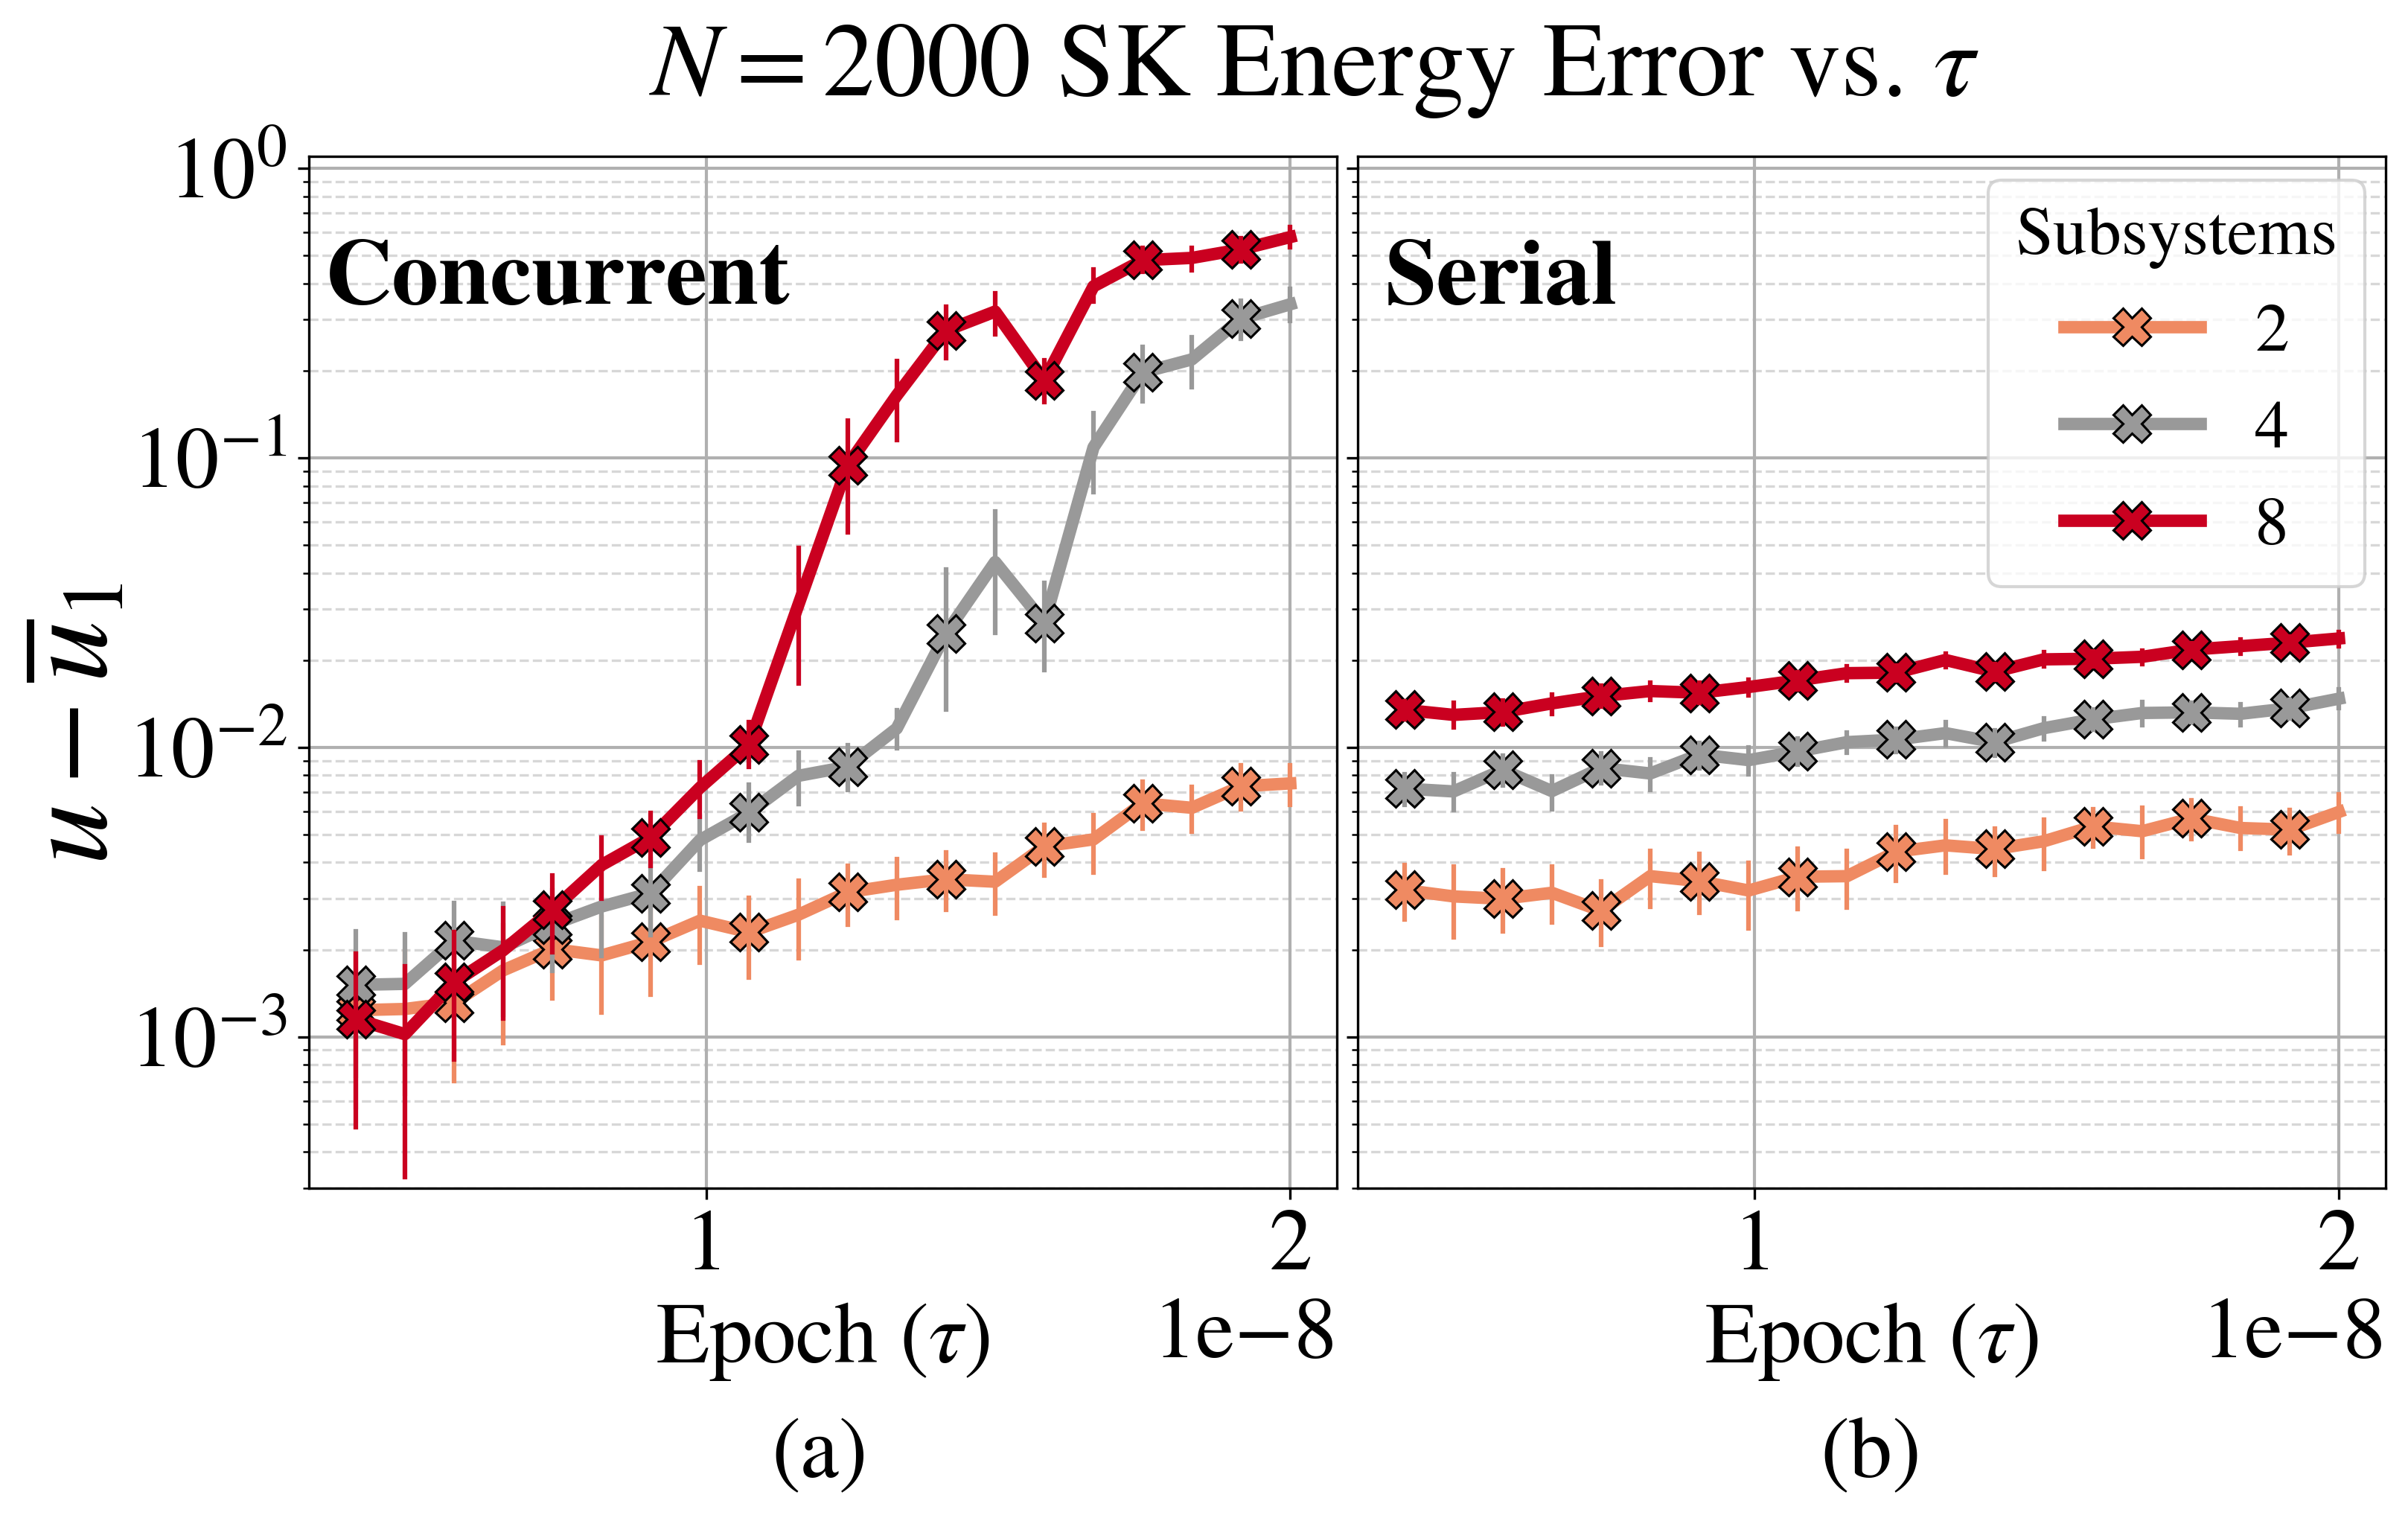

-0.75640510400923

In [50]:
brim_df = pd.read_csv('../data/sk_full.csv').rename(columns={'blocks': 'Subsystems'})
brim_df['Model'] = brim_df['concurrent'].replace({True: 'Conc.', False: 'Serial'})
fig, axs = plt.subplots(ncols=2, figsize=(12,6), gridspec_kw=dict(wspace=0.02))
palette = [ 
        #    "#404040",
            "#ef8a62",
            "#999999",
            "#ca0020"
            ]
# axs = [ax]
brim_df['Bandwidth'] = 1 / brim_df['tpart'] / 1e6
constant = brim_df.query('nodes == 2000 and Subsystems == 1')['u'].mean()
# print(constn)
print(constant)
brim_df['error'] = brim_df['u'] - constant
line_args = dict(
    y='error',
    x='tpart',
    linestyle='solid',
    # marker='X',
    markers=True,
    markersize=12,
    markeredgecolor='black',
    marker='X',
    linewidth=4,
    hue='Subsystems',
    err_style='bars',
    markevery=2,
    palette=palette
)
sns.lineplot(ax=axs[0],
             data=brim_df.query('nodes==2000 and (concurrent== True) and ( Subsystems == 2 or Subsystems == 4 or Subsystems == 8)'), 
             **line_args)
sns.lineplot(ax=axs[1],
             data=brim_df.query('nodes==2000 and (concurrent== False) and ( Subsystems == 2 or Subsystems == 4 or Subsystems == 8)'), 
             **line_args)
axs[1].legend(fontsize=22)
for ax, label in zip(axs, ['a', 'b', 'c', 'd']):
    ax.set_yscale('log')
    ax.set_xlabel('Sync Frequency ($\\tau^{-1}$, MHz)')
    ax.set_ylim(3e-4, 11e-1)
    ax.grid(which='minor', linestyle='--', alpha=0.5)
    ax.grid(which='major', linewidth=1)
    ax.annotate(text=f"({label})", xy=(0.45, -0.28), xycoords='axes fraction', fontsize=28)
print(axs[0].get_xticks())
for ax in axs[1:]:
    ax.set_ylabel('')
    ax.set_yticklabels(['' for i in ax.get_yticks()])
for ax in axs[0:-1]:
    ax.legend_ = None

axs[0].set_ylabel(r'$u - \overline{u}_1$', fontsize=40)
axs[0].yaxis.set_label_coords(-0.17,0.45)
fig.suptitle('$N=2000$ SK Energy Error vs. $\\tau$')
axs[-1].legend(fontsize=22, title_fontsize=22, title='Subsystems', bbox_to_anchor=(0.58, .55), loc='lower left', ncol=1)
axs[0].annotate('Concurrent', xy=(0.135, .8), xycoords='subfigure fraction', weight='bold', fontsize=30)
axs[1].annotate('Serial', xy=(0.575, .8), xycoords='subfigure fraction', weight='bold', fontsize=30)
axs[0].set_xlabel("Epoch ($\\tau$)")
axs[1].set_xlabel("Epoch ($\\tau$)")
fig.savefig('../figures/fig_7_sk_comparison.pdf', bbox_inches='tight', dpi=300)
plt.show()
brim_df.query("nodes == 2000").groupby('Subsystems').agg({'u': 'mean'})
constant